In [2]:
from jwave.geometry import Domain
from jax import numpy as jnp
from jwave.geometry import Medium,TimeAxis,_points_on_circle, Sensors, _circ_mask
from jwave.acoustics import ongrid_wave_propagation
from jwave.extras.external_solvers import kWaveSolver
from jwave.phantoms import three_circles

In [3]:
k_solver = kWaveSolver()

Connecting to Matlab session MATLAB_143515


In [4]:
# Setup simulation
N, dx = (256, 256), (0.1e-3, 0.1e-3)
domain = Domain(N, dx)

# heterogeneous sound speed
sound_speed = jnp.ones(N)*1500
sound_speed = sound_speed.at[30:200,50:80].set(2500.)

medium = Medium(domain=domain, sound_speed=sound_speed, pml_size=20)
time_axis = TimeAxis.from_medium(medium, cfl=0.3)
sensors = Sensors(positions=(jnp.array([192]), jnp.array([192])))

params, j_solver = ongrid_wave_propagation(
    medium=medium,
    time_array=time_axis,
    output_t_axis = time_axis,
    sensors=sensors,
    backprop=False,
    p0 = three_circles(N)
)

In [6]:
p_kwave, kwave_time = k_solver.solve(
    params, 
    dx, 
    time_axis.t_end,
    sensors=sensors,
)

In [7]:
p_jwave = j_solver(params)

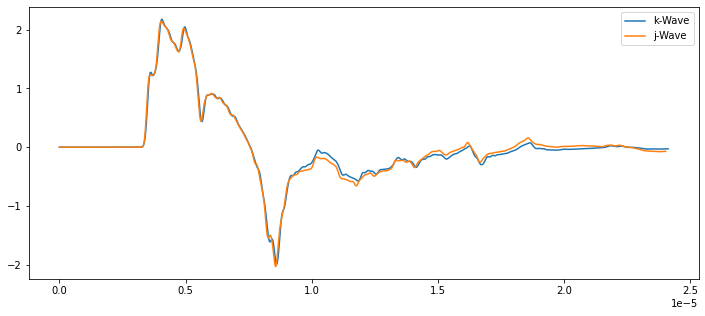

In [8]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(kwave_time, p_kwave[0], label="k-Wave")
plt.plot(time_axis.to_array(), p_jwave[:-1], label="j-Wave")
plt.legend()
plt.show()